In [1]:
import itertools as it
import networkx as nx
import matplotlib.pyplot as plt


def vsi_grafi(n, e):
    # Generate all possible edges combinations
    all_edges = list(it.combinations(range(n), 2))
    
    # Check if e is valid
    if e < n-1 or e > len(all_edges):
        raise ValueError("Invalid number of edges for a graph with {} nodes.".format(n))
    
    # Generate all graphs with n nodes and e edges
    graphs = []
    for edges in it.combinations(all_edges, e):
        G = nx.Graph()
        G.add_nodes_from(range(n))
        G.add_edges_from(edges)
        if nx.is_connected(G):
            graphs.append(G)
    
    return graphs

# n = 2
# 
# for i in range(1, n + 1):
#     for j in range(i-1, int(i*(i-1)/2 + 1)):
#         for g in vsi_grafi(i, j):
#             print(g.degree())
#             plt.figure(figsize=(8, 8))
#             nx.draw(g, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=10)
#             plt.show()
#             g.nodes()


In [2]:
import networkx as nx
import matplotlib.pyplot as plt


def vsota_razdalj(graf, vozlisce):
    vsota = 0
    for v in graf.nodes - {vozlisce}:
        vsota += nx.shortest_path_length(graf, vozlisce, v)
    return vsota


def potratno_ravnovesje_sum(graf):
    for v1 in graf.nodes:
        for p in list(graf.edges(v1)):
            for v2 in graf.nodes - {v1}:
                testni_graf = graf.copy()
                testni_graf.remove_edge(*p)
                testni_graf.add_edge(v1, v2)
                if nx.is_connected(testni_graf):
                    if vsota_razdalj(graf, v1) > vsota_razdalj(testni_graf, v1):
                        return f"Ni sum ravnovesje, vozlišču {v1} se splača zamenjati povezavo {p} z povezavo {v1, v2}"
    return 'Je ravnovesje'


def ekzaktno_sum(graf):
    def loop_sum(graf):
        ravnovesni_graf = graf.copy()
        for v1 in graf.nodes:
            for p in list(graf.edges(v1)):
                for v2 in graf.nodes - {v1}:
                    testni_graf = graf.copy()
                    testni_graf.remove_edge(*p)
                    testni_graf.add_edge(v1, v2)
                    if nx.is_connected(testni_graf):
                        if vsota_razdalj(graf, v1) > vsota_razdalj(testni_graf, v1):
                            ravnovesni_graf = testni_graf.copy()
                            return loop_sum(ravnovesni_graf)
                        
        return ravnovesni_graf
    
    return loop_sum(graf)

# n = 4
# for i in range(4, n + 1):
#     for j in range(i-1, int(i*(i-1)/2 + 1)):
#         for g in vsi_grafi(i, j):
#             print('nov graf')
#             print(g.degree())
#             print(ekzaktno_sum(g).degree())


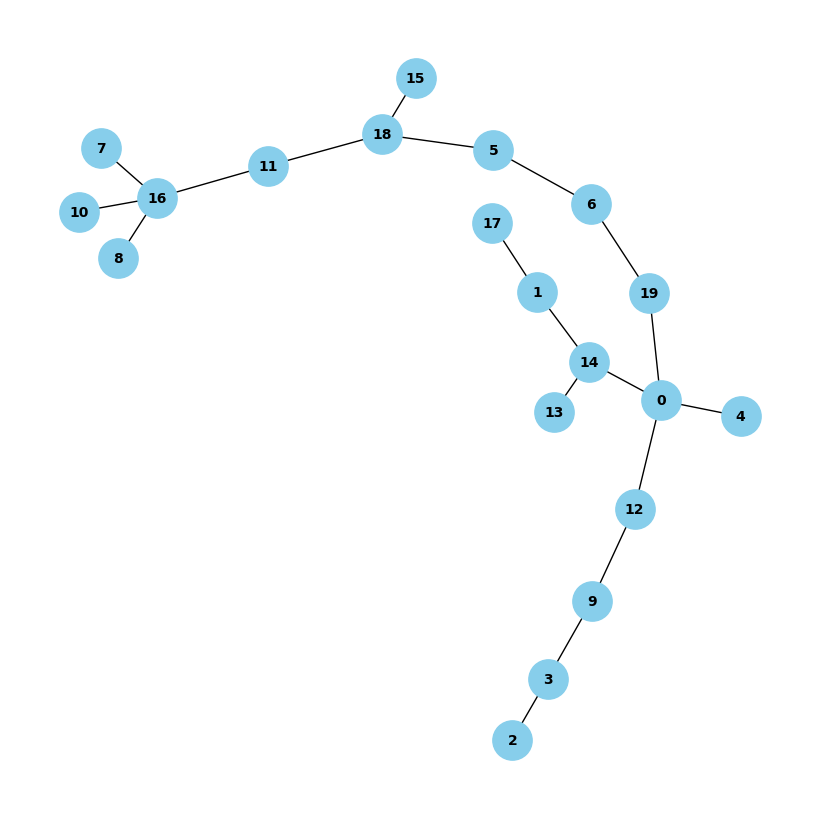

[(0, 66), (1, 94), (2, 126), (3, 108), (4, 84), (5, 72), (6, 68), (7, 118), (8, 118), (9, 92), (10, 118), (11, 88), (12, 78), (13, 96), (14, 78), (15, 96), (16, 100), (17, 112), (18, 78), (19, 66)]
[(0, 4), (1, 2), (2, 1), (3, 2), (4, 1), (5, 2), (6, 2), (7, 1), (8, 1), (9, 2), (10, 1), (11, 2), (12, 2), (13, 1), (14, 3), (15, 1), (16, 4), (17, 1), (18, 3), (19, 2)]
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 19), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)]


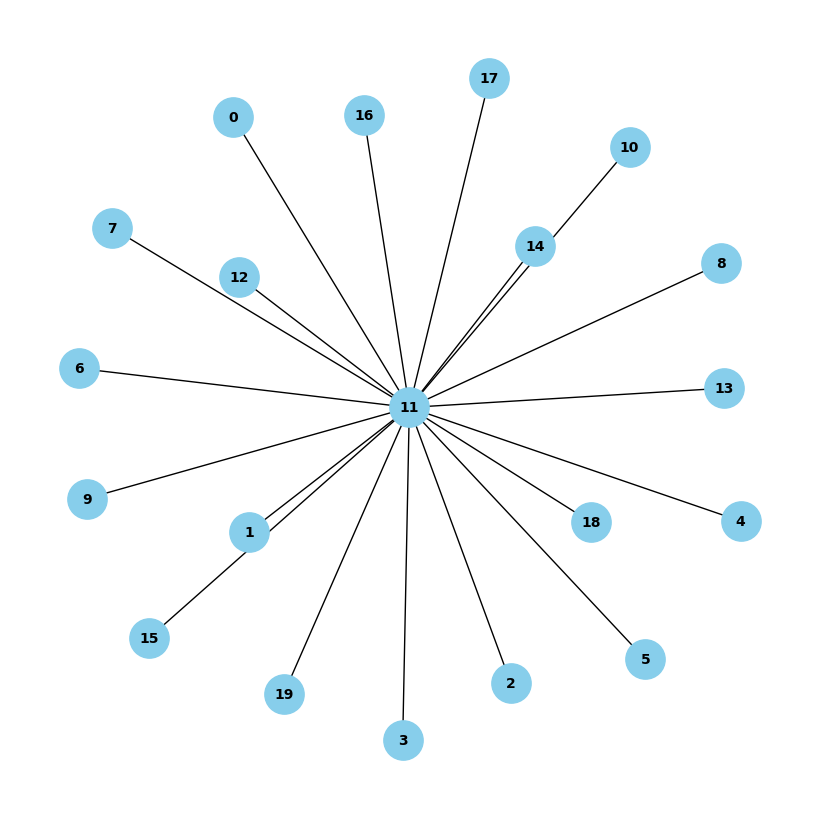

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19))

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import random


def nakljucni_zacetni_graf(n, e):
    # Create an initial random graph with the specified number of nodes
    G = nx.gnm_random_graph(n, e)
    # Ensure the graph is connected
    while not nx.is_connected(G):
        G = nx.gnm_random_graph(n, e)
    return G


def r_g_g(n, m):
    while True:
        G = nx.Graph()
        
        # Add nodes with random positions
        for i in range(n):
            x = random.random()
            y = random.random()
            G.add_node(i, pos=(x, y))
        
        # Add edges between nodes within radius
        for i in range(m):
            v1 = random.choice(list(G.nodes))
            v2 = random.choice(list(G.nodes - set([v1])))
            G.add_edge(v1, v2)
        if nx.is_connected(G):
            return G



n = 20
e = 19

g = nakljucni_zacetni_graf(n, e)



plt.figure(figsize=(8, 8))
nx.draw(g, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=10)
plt.show()
g.nodes()
r = []
for v in g.nodes:
    r.append((v, vsota_razdalj(g, v)))
print(r)
print(g.degree())
opti = ekzaktno_sum(g)
print(opti.degree())
# ro = []
# for ro in g.nodes:
#     ro.append((v, vsota_razdalj(g, v)))
# print(ro)
plt.figure(figsize=(8, 8))
nx.draw(opti, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=10)
plt.show()
opti.nodes()

u: 0 in v: 4 razdalja: 0.407
u: 0 in v: 5 razdalja: 0.201
u: 1 in v: 3 razdalja: 0.616
u: 1 in v: 5 razdalja: 0.837
u: 2 in v: 4 razdalja: 0.43
u: 2 in v: 7 razdalja: 0.311
u: 4 in v: 6 razdalja: 0.181
Shortest path to vertex 4: [4], distance: 0.407
Shortest path to vertex 5: [5], distance: 0.201
Shortest path to vertex 2: [4, 2], distance: 0.837
Shortest path to vertex 6: [4, 6], distance: 0.588
Shortest path to vertex 1: [5, 1], distance: 1.038
Shortest path to vertex 7: [4, 2, 7], distance: 1.148
Shortest path to vertex 3: [5, 1, 3], distance: 1.654


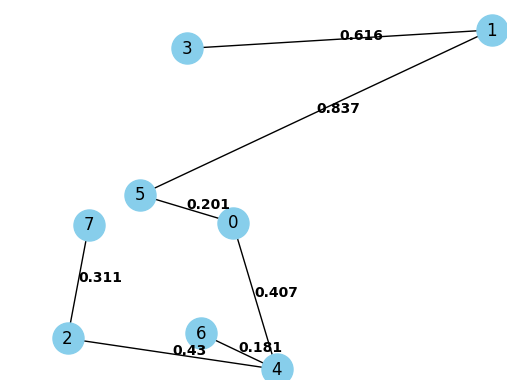

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import math
from collections import deque


def euclidean_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Draw the graph

def obtezen_graf(n, m):
    while True:
        G = nx.Graph()
        
        # Add nodes with random positions
        for i in range(n):
            x = random.random()
            y = random.random()
            G.add_node(i, pos=(x, y))
        
        # Add edges between nodes within radius
        for i in range(m):
            v1 = random.choice(list(G.nodes))
            v2 = random.choice(list(G.nodes - set([v1])))
            G.add_edge(v1, v2)
        if nx.is_connected(G):
            pos = nx.get_node_attributes(G, 'pos')
            # Assign weights to edges based on Euclidean distances
            for (u, v) in G.edges():
                G.edges[u, v]['weight'] = round(euclidean_distance(pos[u], pos[v]), 3)
            
            return G


def bfs_shortest_paths(graph, start):
    # Initialize a dictionary to store the shortest paths and distances to all vertices
    shortest_paths = {}
    distances = {}
    
    # Initialize all distances to infinity
    for vertex in graph.nodes():
        distances[vertex] = float('inf')
    
    # Initialize a queue for BFS
    queue = deque([start])
    distances[start] = 0

    # Perform BFS
    while queue:
        vertex = queue.popleft()
        for neighbor in graph.neighbors(vertex):
            edge_weight = graph.edges[vertex, neighbor]['weight']  # Access edge weight
            if distances[neighbor] > distances[vertex] + edge_weight:
                distances[neighbor] = distances[vertex] + edge_weight
                shortest_paths[neighbor] = shortest_paths.get(vertex, []) + [neighbor]
                queue.append(neighbor)

    return shortest_paths, distances

# Create a sample graph
G = obtezen_graf(8,7)

for (u, v) in G.edges():
    print(f"u: {u} in v: {v} razdalja: {G.edges[u, v]['weight']}")

# Calculate shortest paths and distances from vertex 0
shortest_paths, distances = bfs_shortest_paths(G, 0)

# Print shortest paths and distances to all vertices
for vertex, path in shortest_paths.items():
    print(f"Shortest path to vertex {vertex}: {path}, distance: {distances[vertex]}")


# Draw the graph
pos = nx.get_node_attributes(G, 'pos')  # Get positions

# Create figure and axis
fig, ax = plt.subplots()

# Draw nodes
nx.draw(G, pos, ax=ax, with_labels=True, node_size=500, node_color='skyblue', font_size=12)

# Display distances
for u, v, data in G.edges(data=True):
    ax.text((pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2, str(data['weight']), fontsize=10, color='black', fontweight='bold')

# Set axis limits
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()


[(0, 3.122), (1, 7.55), (2, 5.3500000000000005), (3, 6.002), (4, 4.822), (5, 3.926), (6, 3.7359999999999998), (7, 4.712)]
[(0, 4), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 3), (7, 1)]


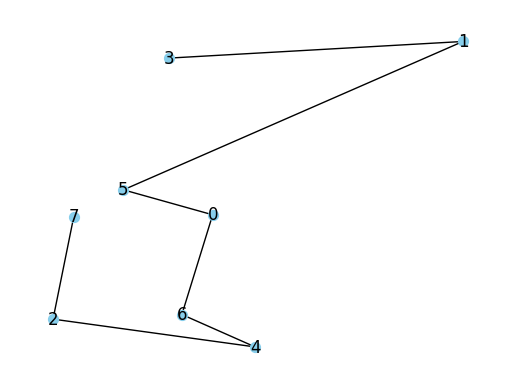

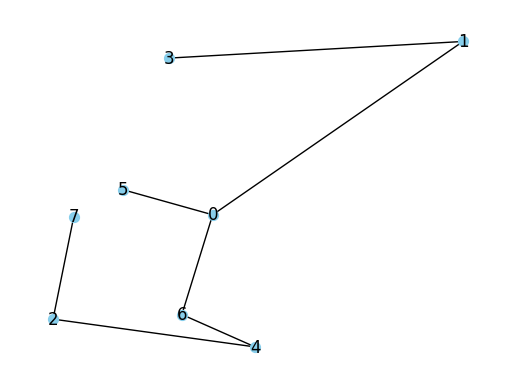

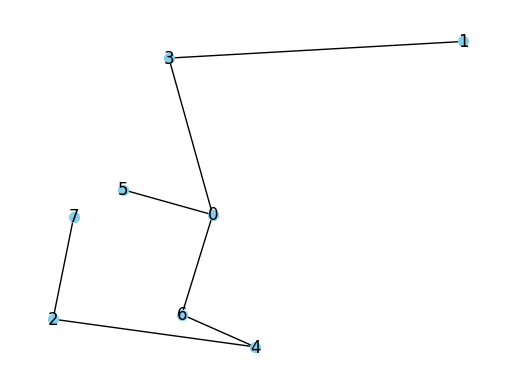

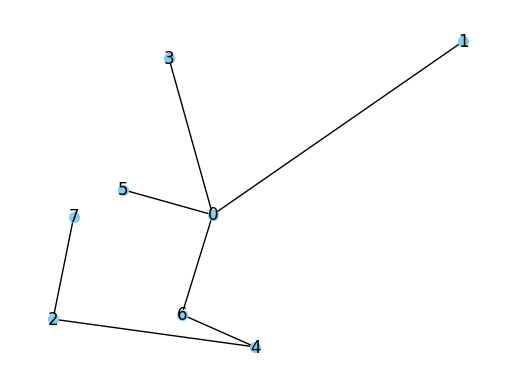

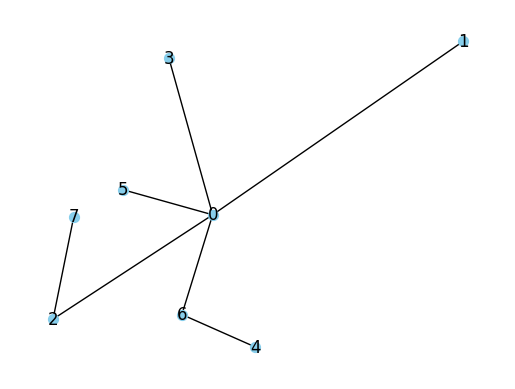

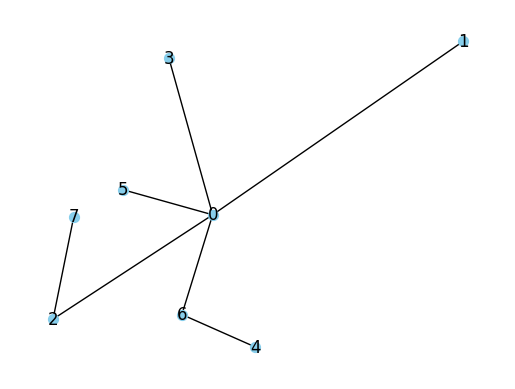

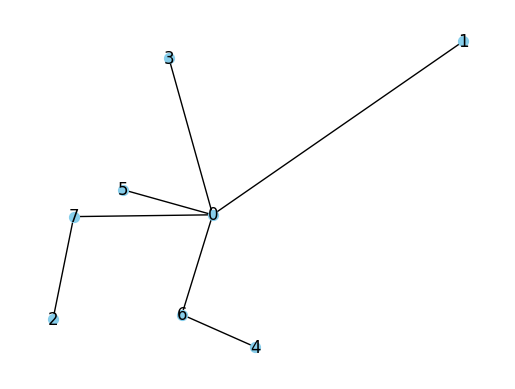

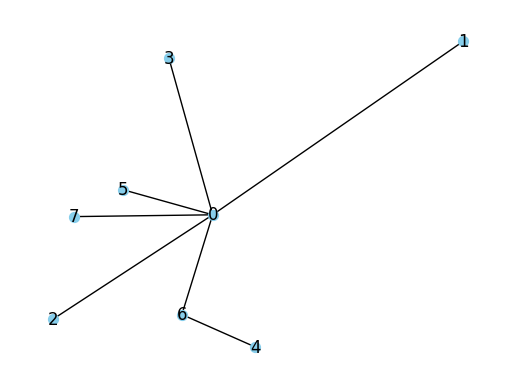

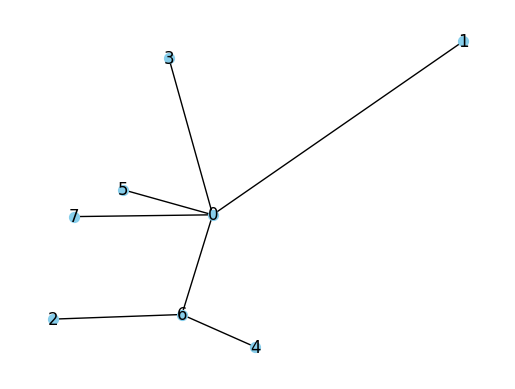

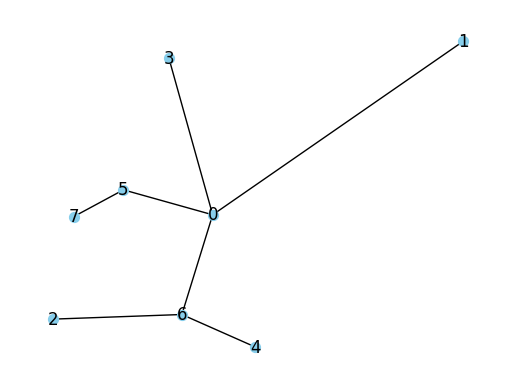

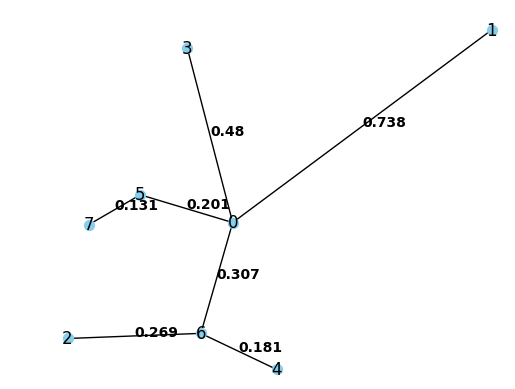

In [5]:
import sys

# Set the desired recursion limit
new_limit = 10000  # Or any other value you prefer

# Set the new recursion limit
sys.setrecursionlimit(new_limit)


def vsota_razdalj(graf, v):
    shortest_paths, distances = bfs_shortest_paths(graf, v)
    vsota = 0
    for vertex, path in shortest_paths.items():
        vsota += distances[vertex]
    return vsota

def ekzaktno_sum(graf):
    n = len(graf.nodes)
    def loop_sum(graf):
        ravnovesni_graf = graf.copy()
        for v1 in graf.nodes:
            for p in list(graf.edges(v1)):
                for v2 in graf.nodes - {v1}:
                    testni_graf = graf.copy()
                    testni_graf.remove_edge(*p)
                    testni_graf.add_edge(v1, v2)
                    testni_graf.edges[v1, v2]['weight'] = round(euclidean_distance(pos[v1], pos[v2]), 3)
                    if nx.is_connected(testni_graf) and vsota_razdalj(graf, v1) > vsota_razdalj(testni_graf, v1):
                        ravnovesni_graf = testni_graf.copy()
                        fig, ax = plt.subplots()
                        nx.draw(ravnovesni_graf, pos, ax=ax, with_labels=True, node_size=50, node_color='skyblue', font_size=12)
                        return loop_sum(ravnovesni_graf)
        return ravnovesni_graf
    return loop_sum(graf)

# Create a sample graph
opti = ekzaktno_sum(G)
# Create figure and axis
fig, ax = plt.subplots()

# Draw nodes
nx.draw(opti, pos, ax=ax, with_labels=True, node_size=50, node_color='skyblue', font_size=12)
opti.nodes()
rp = []
for v in opti.nodes:
    rp.append((v, vsota_razdalj(opti, v)))
print(rp)
print(opti.degree())

# Display distances
for u, v, data in opti.edges(data=True):
    ax.text((pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2, str(data['weight']), fontsize=10, color='black', fontweight='bold')

# Set axis limits
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()

In [ ]:
def opti_v_sum(graf):
    n = len(graf.nodes)
    def loop_sum(graf):
        ravnovesni_graf = graf.copy()
        for v1 in graf.nodes:
            for p in list(graf.edges(v1)):
                for v2 in graf.nodes - {v1}:
                    testni_graf = graf.copy()
                    testni_graf.remove_edge(*p)
                    testni_graf.add_edge(v1, v2)
                    testni_graf.edges[v1, v2]['weight'] = round(euclidean_distance(pos[v1], pos[v2]), 3)
                    if nx.is_connected(testni_graf) and vsota_razdalj(graf, v1) > vsota_razdalj(testni_graf, v1):
                        ravnovesni_graf = testni_graf.copy()
                        fig, ax = plt.subplots()
                        nx.draw(ravnovesni_graf, pos, ax=ax, with_labels=True, node_size=50, node_color='skyblue', font_size=12)
                        return loop_sum(ravnovesni_graf)
        return ravnovesni_graf
    return loop_sum(graf)


In [1]:
import itertools

# Define the existing graph as an edge list
existing_edges = [(0, 1), (0, 2), (1, 2), (2, 3)]  # Example graph

# Define the total number of nodes
n = 4

# Define the specific node and its degree constraint
specific_node = 0
required_degree = 3


In [2]:
# Find existing edges involving the specific node
existing_edges_for_node = [edge for edge in existing_edges if specific_node in edge]

# Count current degree
current_degree = len(existing_edges_for_node)


In [3]:
# Generate all possible edges for the specific node
all_possible_edges_for_node = [(specific_node, i) for i in range(n) if i != specific_node]

# Filter out edges that already exist
possible_new_edges = [edge for edge in all_possible_edges_for_node if edge not in existing_edges and (edge[1], edge[0]) not in existing_edges]


In [4]:
def valid_combination(edges, required_degree):
    return len(edges) == required_degree

# Calculate how many more edges are needed
needed_edges_count = required_degree - current_degree

# Generate valid combinations of edges
def find_combinations_for_node(existing_edges, possible_edges, needed_edges_count):
    from itertools import combinations
    
    for new_edges in combinations(possible_edges, needed_edges_count):
        combined_edges = existing_edges + list(new_edges)
        if valid_combination(combined_edges, required_degree):
            yield combined_edges

# Get the existing edges involving the specific node
existing_edges_for_node = [edge for edge in existing_edges if specific_node in edge]

# Get valid combinations
valid_combinations = list(find_combinations_for_node(existing_edges_for_node, possible_new_edges, needed_edges_count))

# Display valid combinations
for combo in valid_combinations:
    print(combo)


[(0, 1), (0, 2), (0, 3)]


In [5]:
existing_edges = [(0, 1), (0, 2), (1, 2), (2, 3)]
n = 4
specific_node = 0
required_degree = 3

# Find existing edges involving the specific node
existing_edges_for_node = [edge for edge in existing_edges if specific_node in edge]
current_degree = len(existing_edges_for_node)

# Generate all possible edges for the specific node
all_possible_edges_for_node = [(specific_node, i) for i in range(n) if i != specific_node]
possible_new_edges = [edge for edge in all_possible_edges_for_node if edge not in existing_edges and (edge[1], edge[0]) not in existing_edges]

# Calculate how many more edges are needed
needed_edges_count = required_degree - current_degree

# Generate valid combinations of edges
def find_combinations_for_node(existing_edges, possible_edges, needed_edges_count):
    from itertools import combinations
    
    for new_edges in combinations(possible_edges, needed_edges_count):
        combined_edges = existing_edges + list(new_edges)
        if valid_combination(combined_edges, required_degree):
            yield combined_edges

valid_combinations = list(find_combinations_for_node(existing_edges_for_node, possible_new_edges, needed_edges_count))

for combo in valid_combinations:
    print(combo)


[(0, 1), (0, 2), (0, 3)]
